In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import warnings

In [2]:
warnings.filterwarnings('ignore')
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1


In [3]:
adata = sc.read("sc_endo_diff/counts.tsv", cache=True, var_names='gene_ids')
adata = adata.transpose()

... reading from cache file cache/sc_endo_diff-counts.h5ad


In [4]:
datDir = "/work-zfs/abattle4/prashanthi/project/sc_endo_diff/"
metaDataFile = datDir + "cell_metadata_cols.tsv"
metaData = pd.read_csv(metaDataFile, sep='\t')
adata.obs = metaData

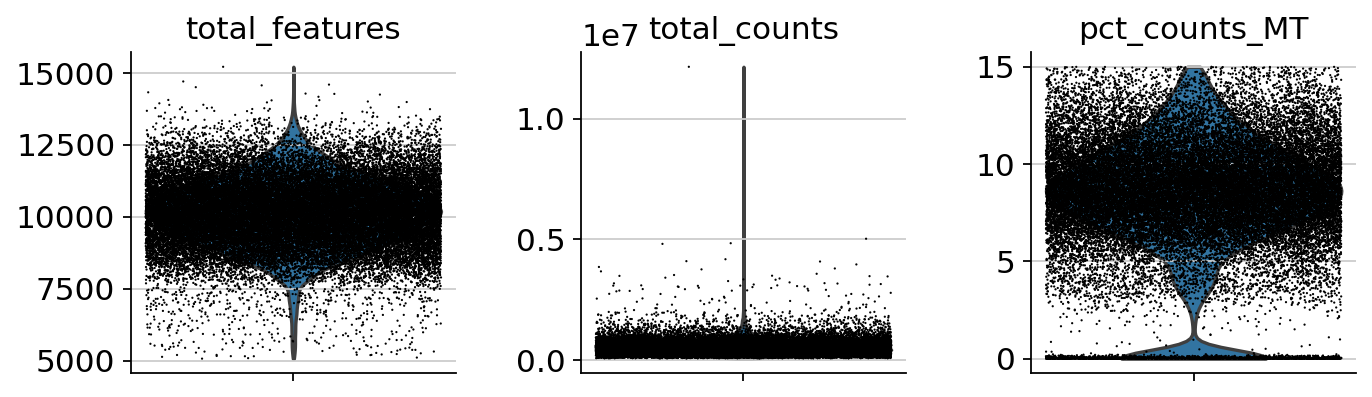

In [16]:
sc.pl.violin(adata, ['total_features', 'total_counts', 'pct_counts_MT'],
             jitter=0.4, multi_panel=True, verbose = False)

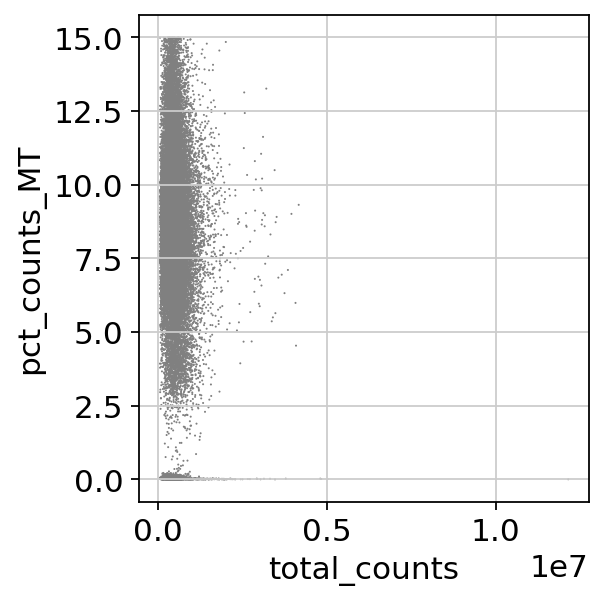

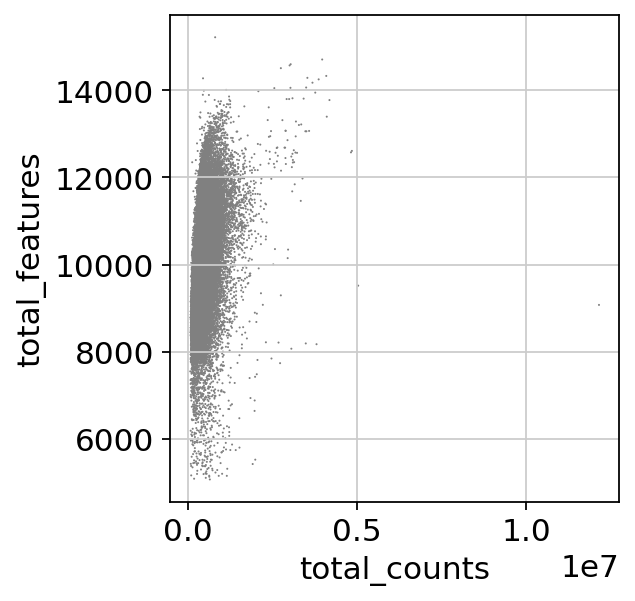

In [6]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_MT')
sc.pl.scatter(adata, x='total_counts', y='total_features')

extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


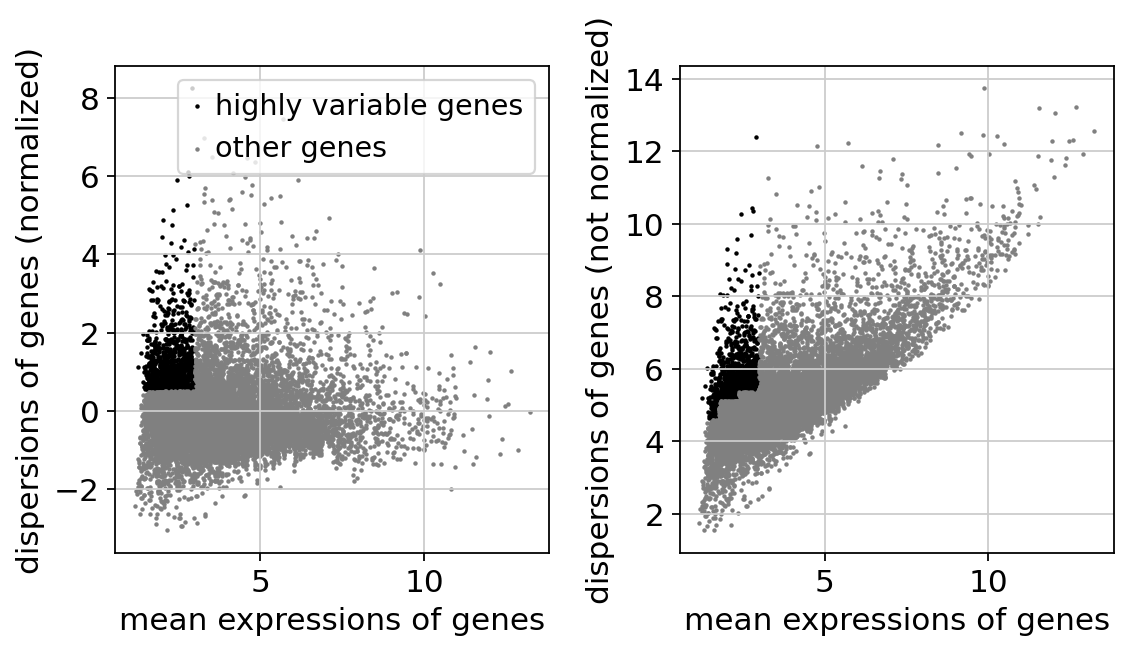

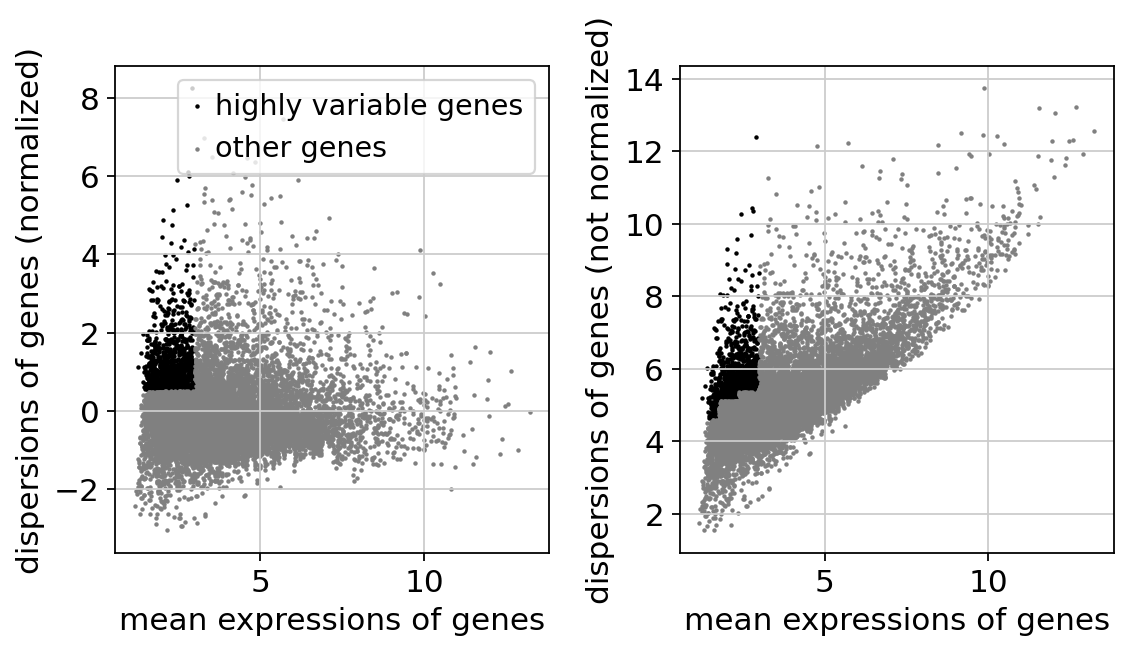

In [7]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
sc.pl.highly_variable_genes(adata)

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:02)


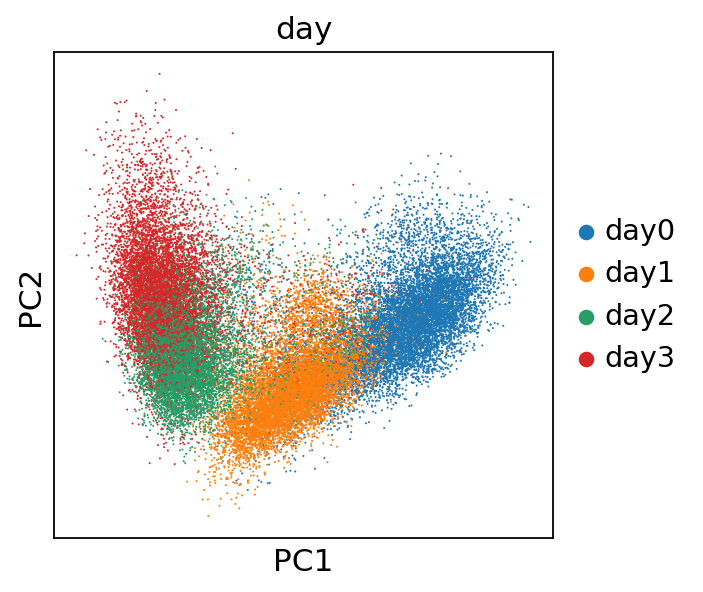

In [8]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable = True)
sc.pl.pca(adata, color='day')

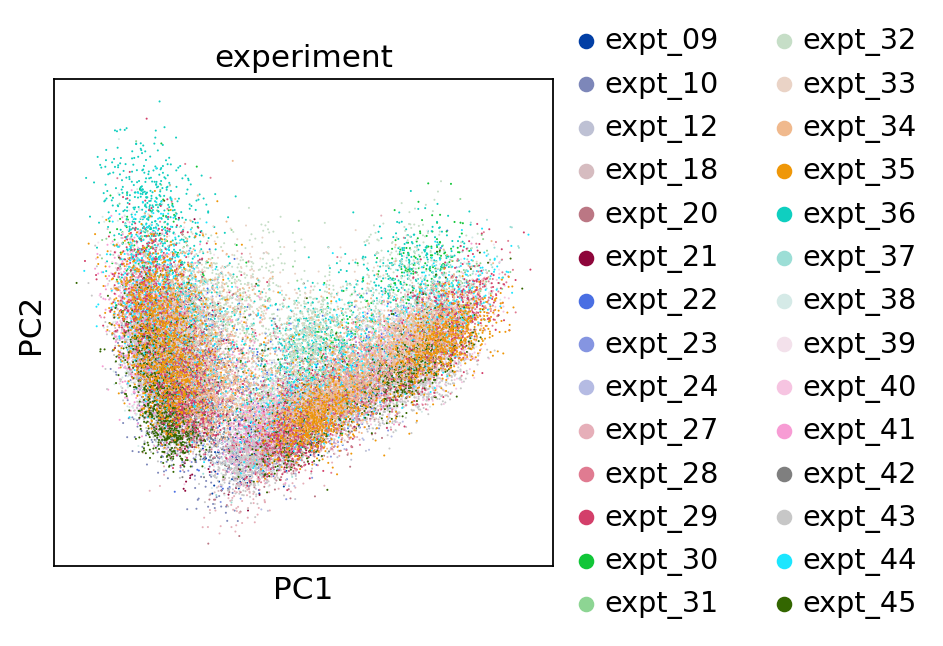

In [9]:
# Visualize the PCA with a few other covariates
sc.pl.pca(adata, color='experiment')

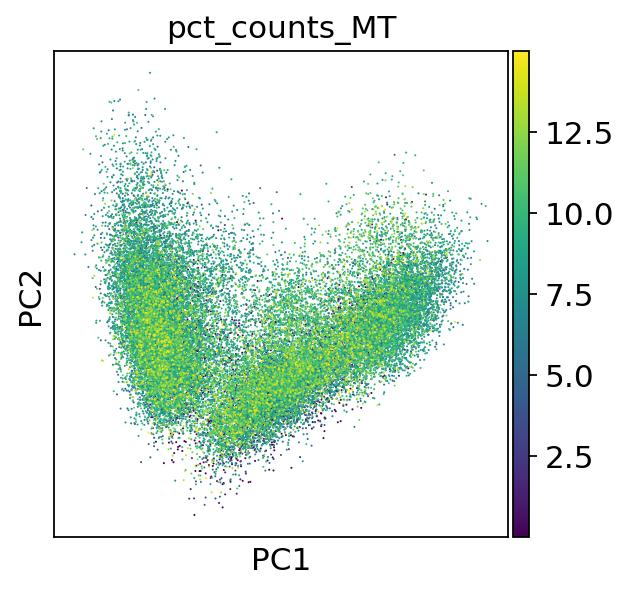

In [10]:
sc.pl.pca(adata, color='pct_counts_MT')

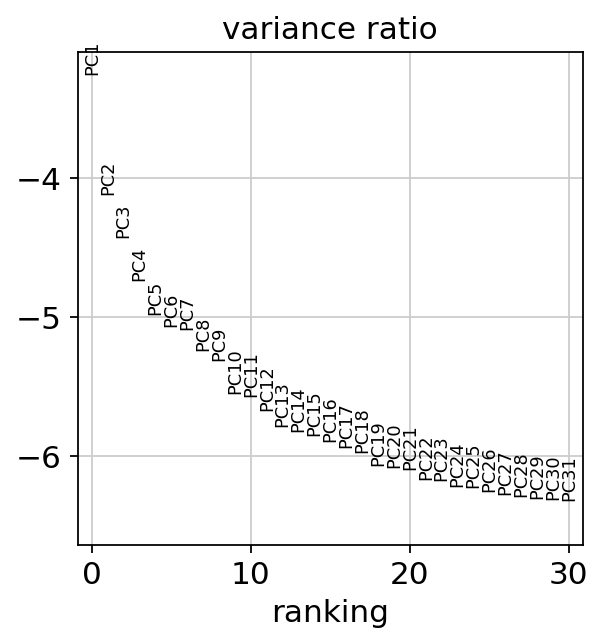

In [11]:
sc.pl.pca_variance_ratio(adata, log=True)

In [12]:
warnings.filterwarnings('ignore')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:30)


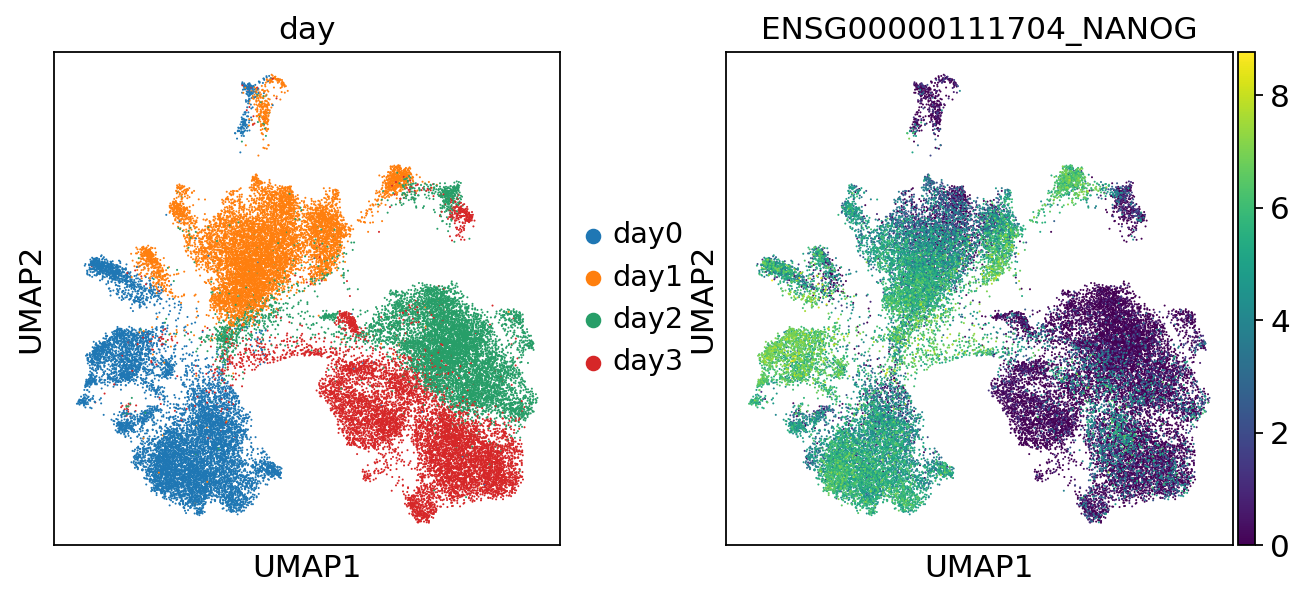

In [13]:
sc.pl.umap(adata, color=['day','ENSG00000111704_NANOG'])

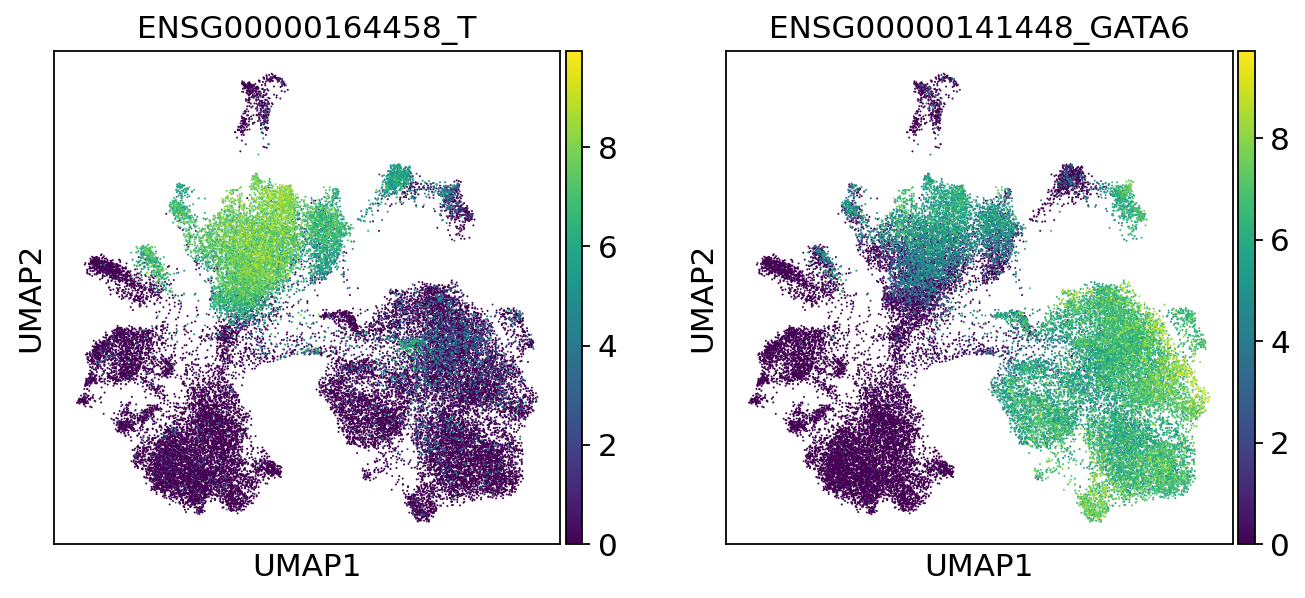

In [14]:
sc.pl.umap(adata, color=['ENSG00000164458_T','ENSG00000141448_GATA6'])